# AI-in-the-Loop: Visuals for Blog 22
This notebook generates visualizations for Blog 22 - 'AI in the Loop: Building a Feedback-Retraining System That Learns from Mistakes'.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


## 📉 Before vs After Retraining: Decision Boundaries

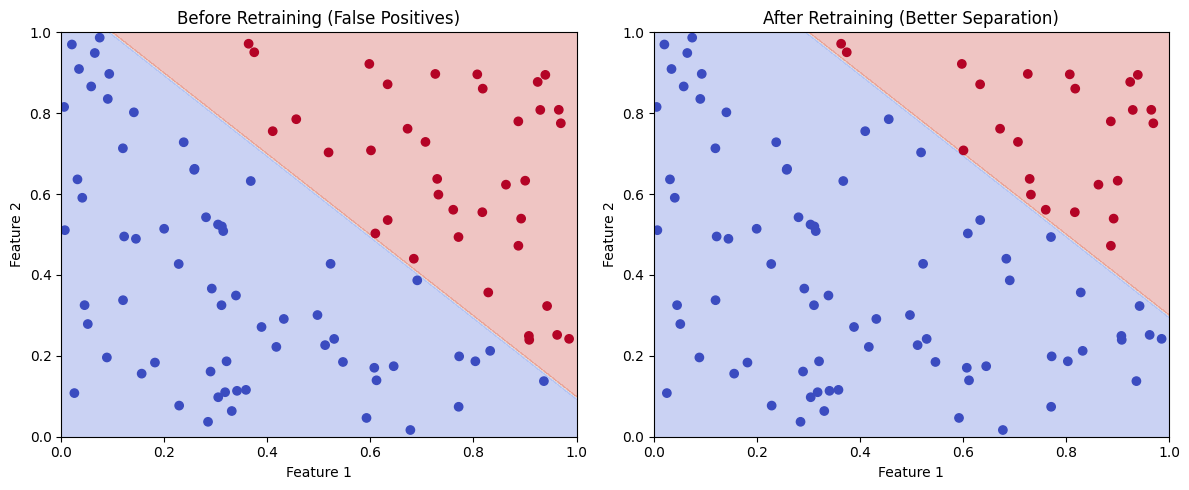

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)
y_before = (X[:, 0] + X[:, 1] > 1.1).astype(int)
y_after = (X[:, 0] + X[:, 1] > 1.3).astype(int)

# Mesh grid
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z_before = (grid[:, 0] + grid[:, 1] > 1.1).astype(int).reshape(xx.shape)
Z_after = (grid[:, 0] + grid[:, 1] > 1.3).astype(int).reshape(xx.shape)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].contourf(xx, yy, Z_before, alpha=0.3, cmap='coolwarm')
ax[0].scatter(X[:, 0], X[:, 1], c=y_before, cmap='coolwarm')
ax[0].set_title('Before Retraining (False Positives)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

ax[1].contourf(xx, yy, Z_after, alpha=0.3, cmap='coolwarm')
ax[1].scatter(X[:, 0], X[:, 1], c=y_after, cmap='coolwarm')
ax[1].set_title('After Retraining (Better Separation)')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## 📊 Model Metrics: Before vs After Retraining

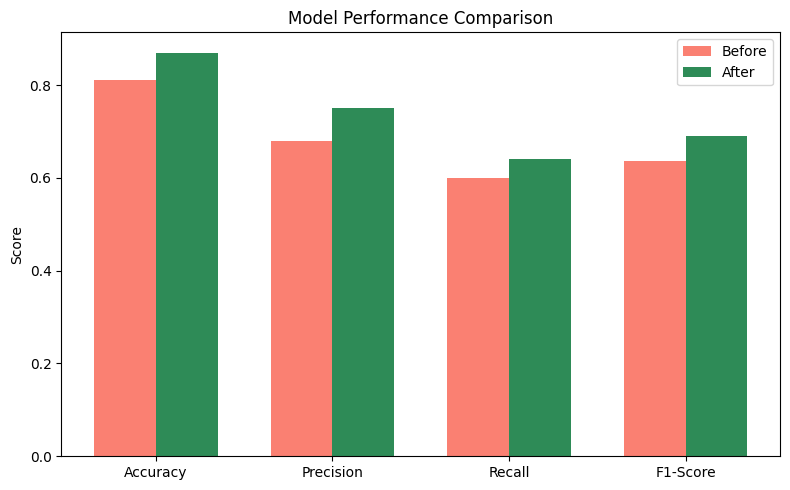

In [3]:
# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before = [0.81, 0.68, 0.60, 0.637]
after = [0.87, 0.75, 0.64, 0.691]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, before, width, label='Before', color='salmon')
ax.bar(x + width/2, after, width, label='After', color='seagreen')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()


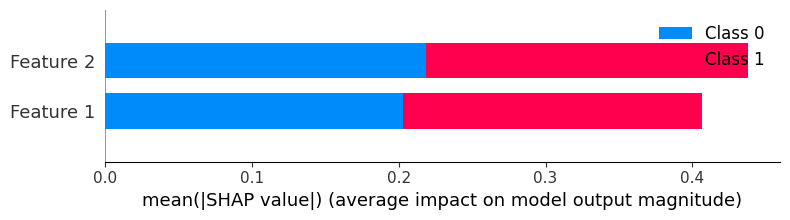


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


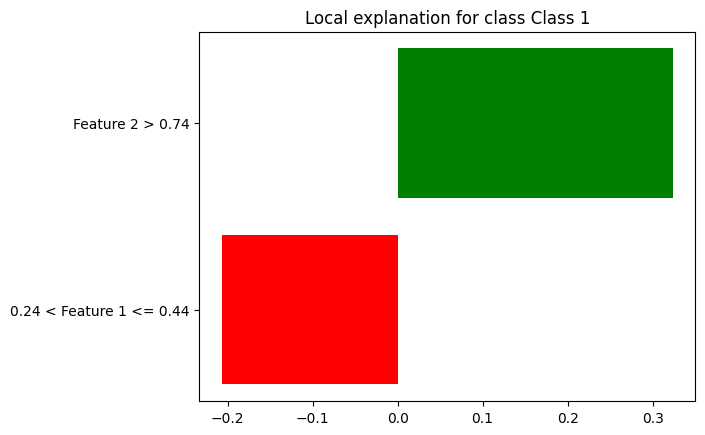

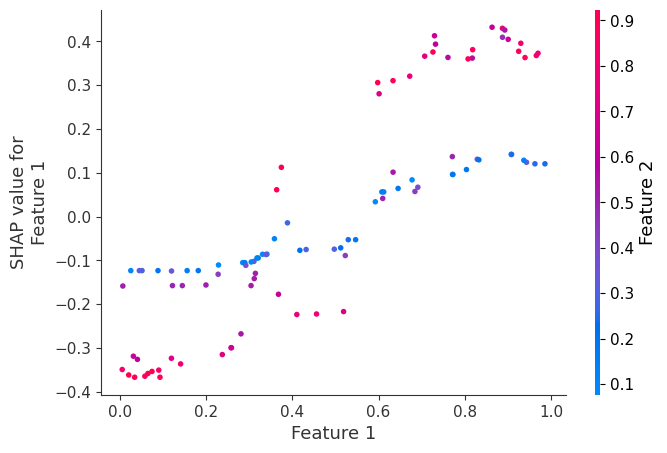

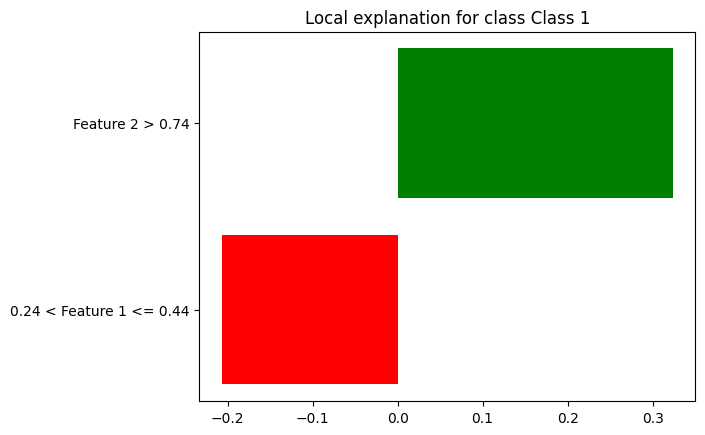

In [4]:
# SHAP Values
import shap
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_after)
# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# Plot SHAP values
shap.summary_plot(shap_values, X, feature_names=['Feature 1', 'Feature 2'], plot_type="bar")
# LIME
%pip install lime
from lime.lime_tabular import LimeTabularExplainer
# Create LIME explainer
explainer = LimeTabularExplainer(X, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], mode='classification')
# Explain a prediction
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X[i], model.predict_proba, num_features=2)
# Plot LIME explanation
exp.as_pyplot_figure()
plt.show()
# SHAP Dependence Plot
shap.dependence_plot(0, shap_values[1], X, feature_names=['Feature 1', 'Feature 2'])
plt.show()
# LIME Feature Importance
exp.as_pyplot_figure()
plt.show()